In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk

In [4]:
data = pd.read_csv('All-CSV-ML-Data-Files-Download-master/spam.tsv', sep='\t')

In [5]:
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [17]:
max(data.length.values)

910

In [18]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [19]:
data.shape

(5572, 4)

### Balancing data

In [20]:
ham = data[data.label=="ham"]
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [21]:
spam = data[data.label=="spam"]
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [32]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [33]:
ham = ham.sample(spam.shape[0])

In [34]:
ham.shape

(747, 4)

In [35]:
data_appended = ham.append(spam, ignore_index=True)
data_appended.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## EDA

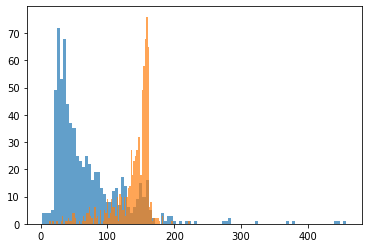

In [39]:
plt.hist(data_appended[data_appended['label']=='ham']['length'],bins=100, alpha=0.7)
plt.hist(data_appended[data_appended['label']=='spam']['length'],bins=100, alpha=0.7)

plt.show()

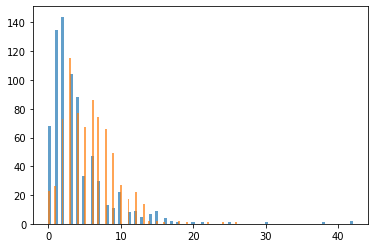

In [40]:
plt.hist(data_appended[data_appended['label']=='ham']['punct'],bins=100, alpha=0.7)
plt.hist(data_appended[data_appended['label']=='spam']['punct'],bins=100, alpha=0.7)

plt.show()

## Data Prep

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
X_train,X_test,y_train,y_test = train_test_split(data_appended['message'], data_appended['label'], test_size=0.3,random_state = 42, shuffle=True, stratify=data_appended['label'])

In [45]:
## Bag of Words

In [46]:
vectorizer = TfidfVectorizer()

In [47]:
X_train = vectorizer.fit_transform(X_train)

In [ ]:
#X_test = vectorizer.transform(X_test)

## Pipeline and RF and SVC

In [95]:
clf_rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf_rf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf_svm = Pipeline([('tfidf', TfidfVectorizer()), ('clf_svm', SVC(C=200, gamma="auto"))])

In [96]:
clf_rf.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf_svm',
                 SVC(C=200, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr',

In [97]:
y_predRF = clf_rf.predict(X_test)
y_predSVM = clf_svm.predict(X_test)

In [98]:
confusion_matrix(y_test, y_predRF)

array([[223,   2],
       [ 22, 202]], dtype=int64)

In [99]:
confusion_matrix(y_test, y_predSVM)

array([[222,   3],
       [ 18, 206]], dtype=int64)

In [100]:
accuracy_score(y_test, y_predRF)

0.9465478841870824

In [101]:
accuracy_score(y_test, y_predSVM)

0.9532293986636972

In [102]:
print(classification_report(y_test, y_predRF))
print('*'*70)
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

**********************************************************************
              precision    recall  f1-score   support

         ham       0.93      0.99      0.95       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [103]:
f1_score(y_test, y_predRF,pos_label='spam'),f1_score(y_test, y_predRF,pos_label='ham')

(0.9439252336448598, 0.948936170212766)

In [104]:
f1_score(y_test, y_predSVM,pos_label='spam'),f1_score(y_test, y_predSVM,pos_label='ham')

(0.951501154734411, 0.9548387096774195)

In [105]:
clf_rf.predict(['Lets won free tickets to world tour'])

array(['ham'], dtype=object)

In [106]:
clf_rf.predict(['Hello World'])

array(['ham'], dtype=object)

In [107]:
clf_svm.predict(['Lets won free tickets to world tour'])

array(['spam'], dtype=object)

In [108]:
clf_svm.predict(['Hello World'])

array(['ham'], dtype=object)